<a href="https://colab.research.google.com/github/mjmkh/TL_for_SGS_Models/blob/main/attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [2]:
df = pd.read_csv('/content/tri contacnated.csv')
df.head()

,Temp,q
0,293.15,1.420000e-12
1,293.15,1.710000e-12
2,293.15,5.680000e-13
3,293.15,-1.420000e-13
4,293.15,-8.530000e-13


In [3]:
X = df['Temp'].values
Y = df['q'].values
X, Y, X.shape, Y.shape 

(array([293.15     , 293.15     , 293.15     , ..., 299.1006592,
        299.1007221, 299.1007863]),
 array([ 1.42000000e-12,  1.71000000e-12,  5.68000000e-13, ...,
        -1.48487621e+01, -1.48489933e+01, -1.48489933e+01]))

Generate Noise

In [21]:
# 0 is the mean of the normal distribution you are choosing from
# 1 is the standard deviation of the normal distribution
# length of temperature is the number of elements in array noise
noise = np.random.normal(0, 0.1, len(X))
print(min(noise), max(noise))
plt.plot(noise)

TypeError: ignored

Add noise to the temperatures

In [6]:
Xn = np.zeros(len(X))

for k in range(len(X)):
  Xn[k] = noise[k] + X[k]

print(len(Xn))

1501


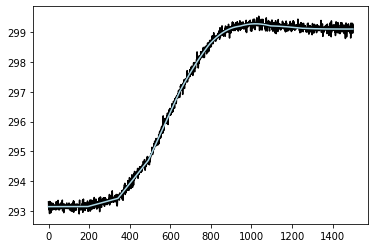

In [12]:
plt.plot(Xn, 'black')
plt.plot(X, 'lightblue')

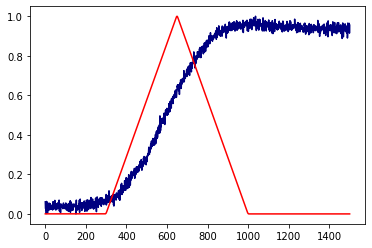

In [13]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
Xm = min_max_scaler.fit_transform(Xn.reshape(-1,1))


Ym = min_max_scaler.fit_transform(Y.reshape(-1,1))

plt.plot(Xm, color='navy')
plt.plot(Ym, color='r')

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xm, Ym, test_size=0.4, random_state=None, shuffle=False)


In [15]:
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0


/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [21]:
!pip uninstall tensorflow -y
!pip install  tensorflow==1.14

Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109.3 MB 33 kB/s 
     |████████████████████████████████| 50 kB 4.4 MB/s 
     |████████████████████████████████| 3.1 MB 11.0 MB/s 
     |████████████████████████████████| 488 kB 29.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are insta

Epoch is: 0050 loss= 0.148499042 W= 1.8629267 b= -0.62522024
Epoch is: 0100 loss= 0.142868251 W= 1.8626009 b= -0.6084558
Epoch is: 0150 loss= 0.137755513 W= 1.8619281 b= -0.5924716
Epoch is: 0200 loss= 0.133110285 W= 1.8610065 b= -0.57723683
Epoch is: 0250 loss= 0.128900573 W= 1.8598408 b= -0.5627706
Epoch is: 0300 loss= 0.125064984 W= 1.8584168 b= -0.54897946
Epoch is: 0350 loss= 0.121562675 W= 1.8568268 b= -0.5358139
Epoch is: 0400 loss= 0.118362345 W= 1.8550885 b= -0.5232494
Epoch is: 0450 loss= 0.115443625 W= 1.8532029 b= -0.5112986
Epoch is: 0500 loss= 0.112770908 W= 1.8511999 b= -0.4998976
Epoch is: 0550 loss= 0.110314555 W= 1.8490503 b= -0.48900142
Epoch is: 0600 loss= 0.108056225 W= 1.84678 b= -0.47859713
Epoch is: 0650 loss= 0.105977610 W= 1.844357 b= -0.46867675
Epoch is: 0700 loss= 0.104054265 W= 1.8417945 b= -0.45918337
Epoch is: 0750 loss= 0.102272272 W= 1.8391052 b= -0.45010346
Epoch is: 0800 loss= 0.100623302 W= 1.8363389 b= -0.4414376
Epoch is: 0850 loss= 0.099086300 W=

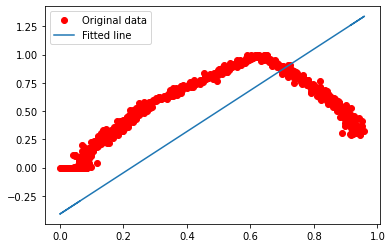

Testing... (Mean square loss Comparison)
Testing cost= 0.8366826
Absolute mean square loss difference: 0.7416268


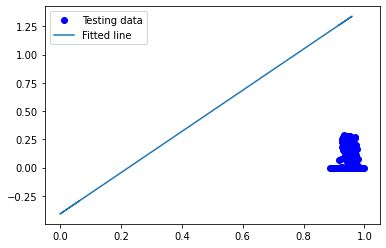

In [19]:
import tensorflow as tf

import matplotlib.pyplot as plt
rndm = np.random

# config parameters
learningRate = 0.001
trainingEpochs = 1000
displayStep = 50

# create the training data
trainX = X_train
trainY = y_train
nSamples = trainX.shape[0]

# tf inputs
X = tf.placeholder("float")
Y = tf.placeholder("float")

# initialize weights and bias
W = tf.Variable(rndm.randn(), name="weight")
b = tf.Variable(rndm.randn(), name="bias")

# linear model
linearModel = tf.add(tf.multiply(X, W), b)

# mean squared error
loss = tf.reduce_sum(tf.pow(linearModel-Y, 2))/(2*nSamples)

# Gradient descent
opt = tf.train.GradientDescentOptimizer(learningRate).minimize(loss)

# initializing variables
init = tf.global_variables_initializer()

# run
with tf.Session() as sess:
    sess.run(init)

    # fitting the training data
    for epoch in range(trainingEpochs):
        for (x, y) in zip(trainX, trainY):
            sess.run(opt, feed_dict={X: x, Y: y})

        # print logs
        if (epoch+1) % displayStep == 0:
            c = sess.run(loss, feed_dict={X: trainX, Y:trainY})
            print("Epoch is:", '%04d' % (epoch+1), "loss=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))

    print("optimization done...")
    trainingLoss = sess.run(loss, feed_dict={X: trainX, Y: trainY})
    print("Training loss=", trainingLoss, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # display the plot
    plt.plot(trainX, trainY, 'ro', label='Original data')
    plt.plot(trainX, sess.run(W) * trainX + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    testX = X_test
    testY = y_test

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(linearModel - Y, 2)) / (2 * testX.shape[0]),
        feed_dict={X: testX, Y: testY})
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(trainingLoss - testing_cost))

    plt.plot(testX, testY, 'bo', label='Testing data')
    plt.plot(trainX, sess.run(W) * trainX + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()